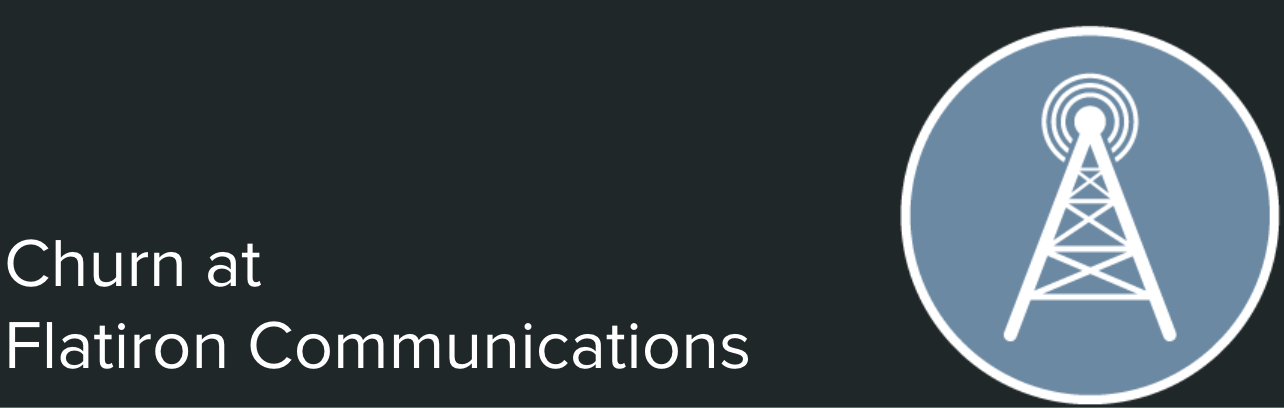

### Authors: Chris Helmerson, Richard Hinds, Olamide Olayinka 

## Overview
While mobile phones may seem like a modern commodity, the first mobile phone call was made by the Detroit police department all the way back in 1921. However, the mobile analog phones of old, suffered from bandwidth issues and weren't considered ordinary consumer goods. That limitation was removed in 1983, when the first cellular phone call was made in Chicago.

The industry proceeded to grow exponentially into the in the 90's where the number of subscribers doubled about every two years. Of course, this kind of growth is unsustainable and the 6 major cellular communications found themselves facing a new problem... "Churn".

## Business Problem
What is "Churn" and why is it such an issue? Churn is industry jargon that refers to when an existing customer leaves their current cell phone provider for another provider, or their service was stopped due to lack of payment. Effectively churn is customer turnover.

While during the 90's and early 00's, the market for cell phone subscribers was doubling every two years, so churn was that big of a problem. Now that the annual growth in subscribers has dwindled from roughly 50% per year to a meager 4% growth annually. With that the rush of new customers is now over, it has never been more important to retain the existing customer base and reduce churn, that it is now.

Currently the average churn rate across the industry is about 22% annually, meaning that about 1 out of every 4 customers will no longer be with their current provider by the end of a calendar year and 9 out of every 10 customers have changed providers within the last 5 years.

## Data Understanding
Our dataset comes from an anonymous top 6 cellular provider and contains information on about 50,000 of their customers, collected through 2014. As stated before, half of churn in industry is due to nonpayment, but our dataset only looked at those who churned voluntarily as those are the customers we are trying to target. Given that APRU nearly $60 and CRC was negligible we decided to use recall as our evaluation metric.

### EDA

Import libraries

In [95]:
# Importing libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, make_scorer, recall_score, plot_roc_curve, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from statsmodels.api import qqplot
from scipy import stats



Load and explore dataset

In [52]:
# Read in csv file and preview DataFrame
df = pd.read_csv('data/cell2celltrain.csv')
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [53]:
# Review DataFram information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [54]:
# Review descriptive statistics
pd.set_option('display.max_columns', None)
df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,4.085672,28.288981,1.868999,0.298838,114.800121,25.377715,8.178104,90.549515,67.650790,10.158003,0.012277,1.840504,18.756264,1.532157,1.354340,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,10.946905,38.876194,5.096138,1.168277,166.485896,35.209147,16.665878,104.947470,92.752699,15.555284,0.594168,5.585129,9.800138,1.223384,0.675477,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.300000,3.300000,0.000000,23.000000,11.000000,1.700000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,52.800000,13.700000,2.000000,62.000000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.300000,1.700000,0.300000,153.500000,34.000000,9.300000,121.300000,88.700000,12.300000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


## Cleaning

Dropped null values and eliminated unuseful columns

In [55]:
df.dropna(how='any', inplace=True)
df.drop(['CustomerID', 'Homeownership', 'NotNewCellphoneUser', 'HandsetPrice',
'PrizmCode', 'Occupation', 'MaritalStatus'], axis=1, inplace=True)

Replaced service area data with zip code

In [56]:
df['ZipCode'] = df['ServiceArea'].str[-3:].astype(int) 
df = df.drop('ServiceArea', axis=1)

Converted categorical strings to numeric data

In [57]:
df.replace(to_replace='Yes', value=1, inplace=True) 
df.replace(to_replace='No', value=0, inplace=True) 
df['CreditRating'] = (df['CreditRating'].str[0]).astype(int)

In [58]:
# Preview cleaned DataFrame
df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,ZipCode
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,4,0,0,1,1,503
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,5,0,0,0,4,412
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,6,0,0,0,3,414
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,6,0,0,0,4,412
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,9,0,1,0,1,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,0,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,1.0,1.0,883.0,48.0,48.0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,4,0,0,0,2,619
51037,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,1.0,1.0,883.0,58.0,0.0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,3,0,0,0,3,760
51040,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,1.0,1.0,882.0,50.0,60.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,7,0,0,0,1,818
51041,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,2.0,2.0,489.0,22.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,5,562


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      49752 non-null  int64  
 1   MonthlyRevenue             49752 non-null  float64
 2   MonthlyMinutes             49752 non-null  float64
 3   TotalRecurringCharge       49752 non-null  float64
 4   DirectorAssistedCalls      49752 non-null  float64
 5   OverageMinutes             49752 non-null  float64
 6   RoamingCalls               49752 non-null  float64
 7   PercChangeMinutes          49752 non-null  float64
 8   PercChangeRevenues         49752 non-null  float64
 9   DroppedCalls               49752 non-null  float64
 10  BlockedCalls               49752 non-null  float64
 11  UnansweredCalls            49752 non-null  float64
 12  CustomerCareCalls          49752 non-null  float64
 13  ThreewayCalls              49752 non-null  flo

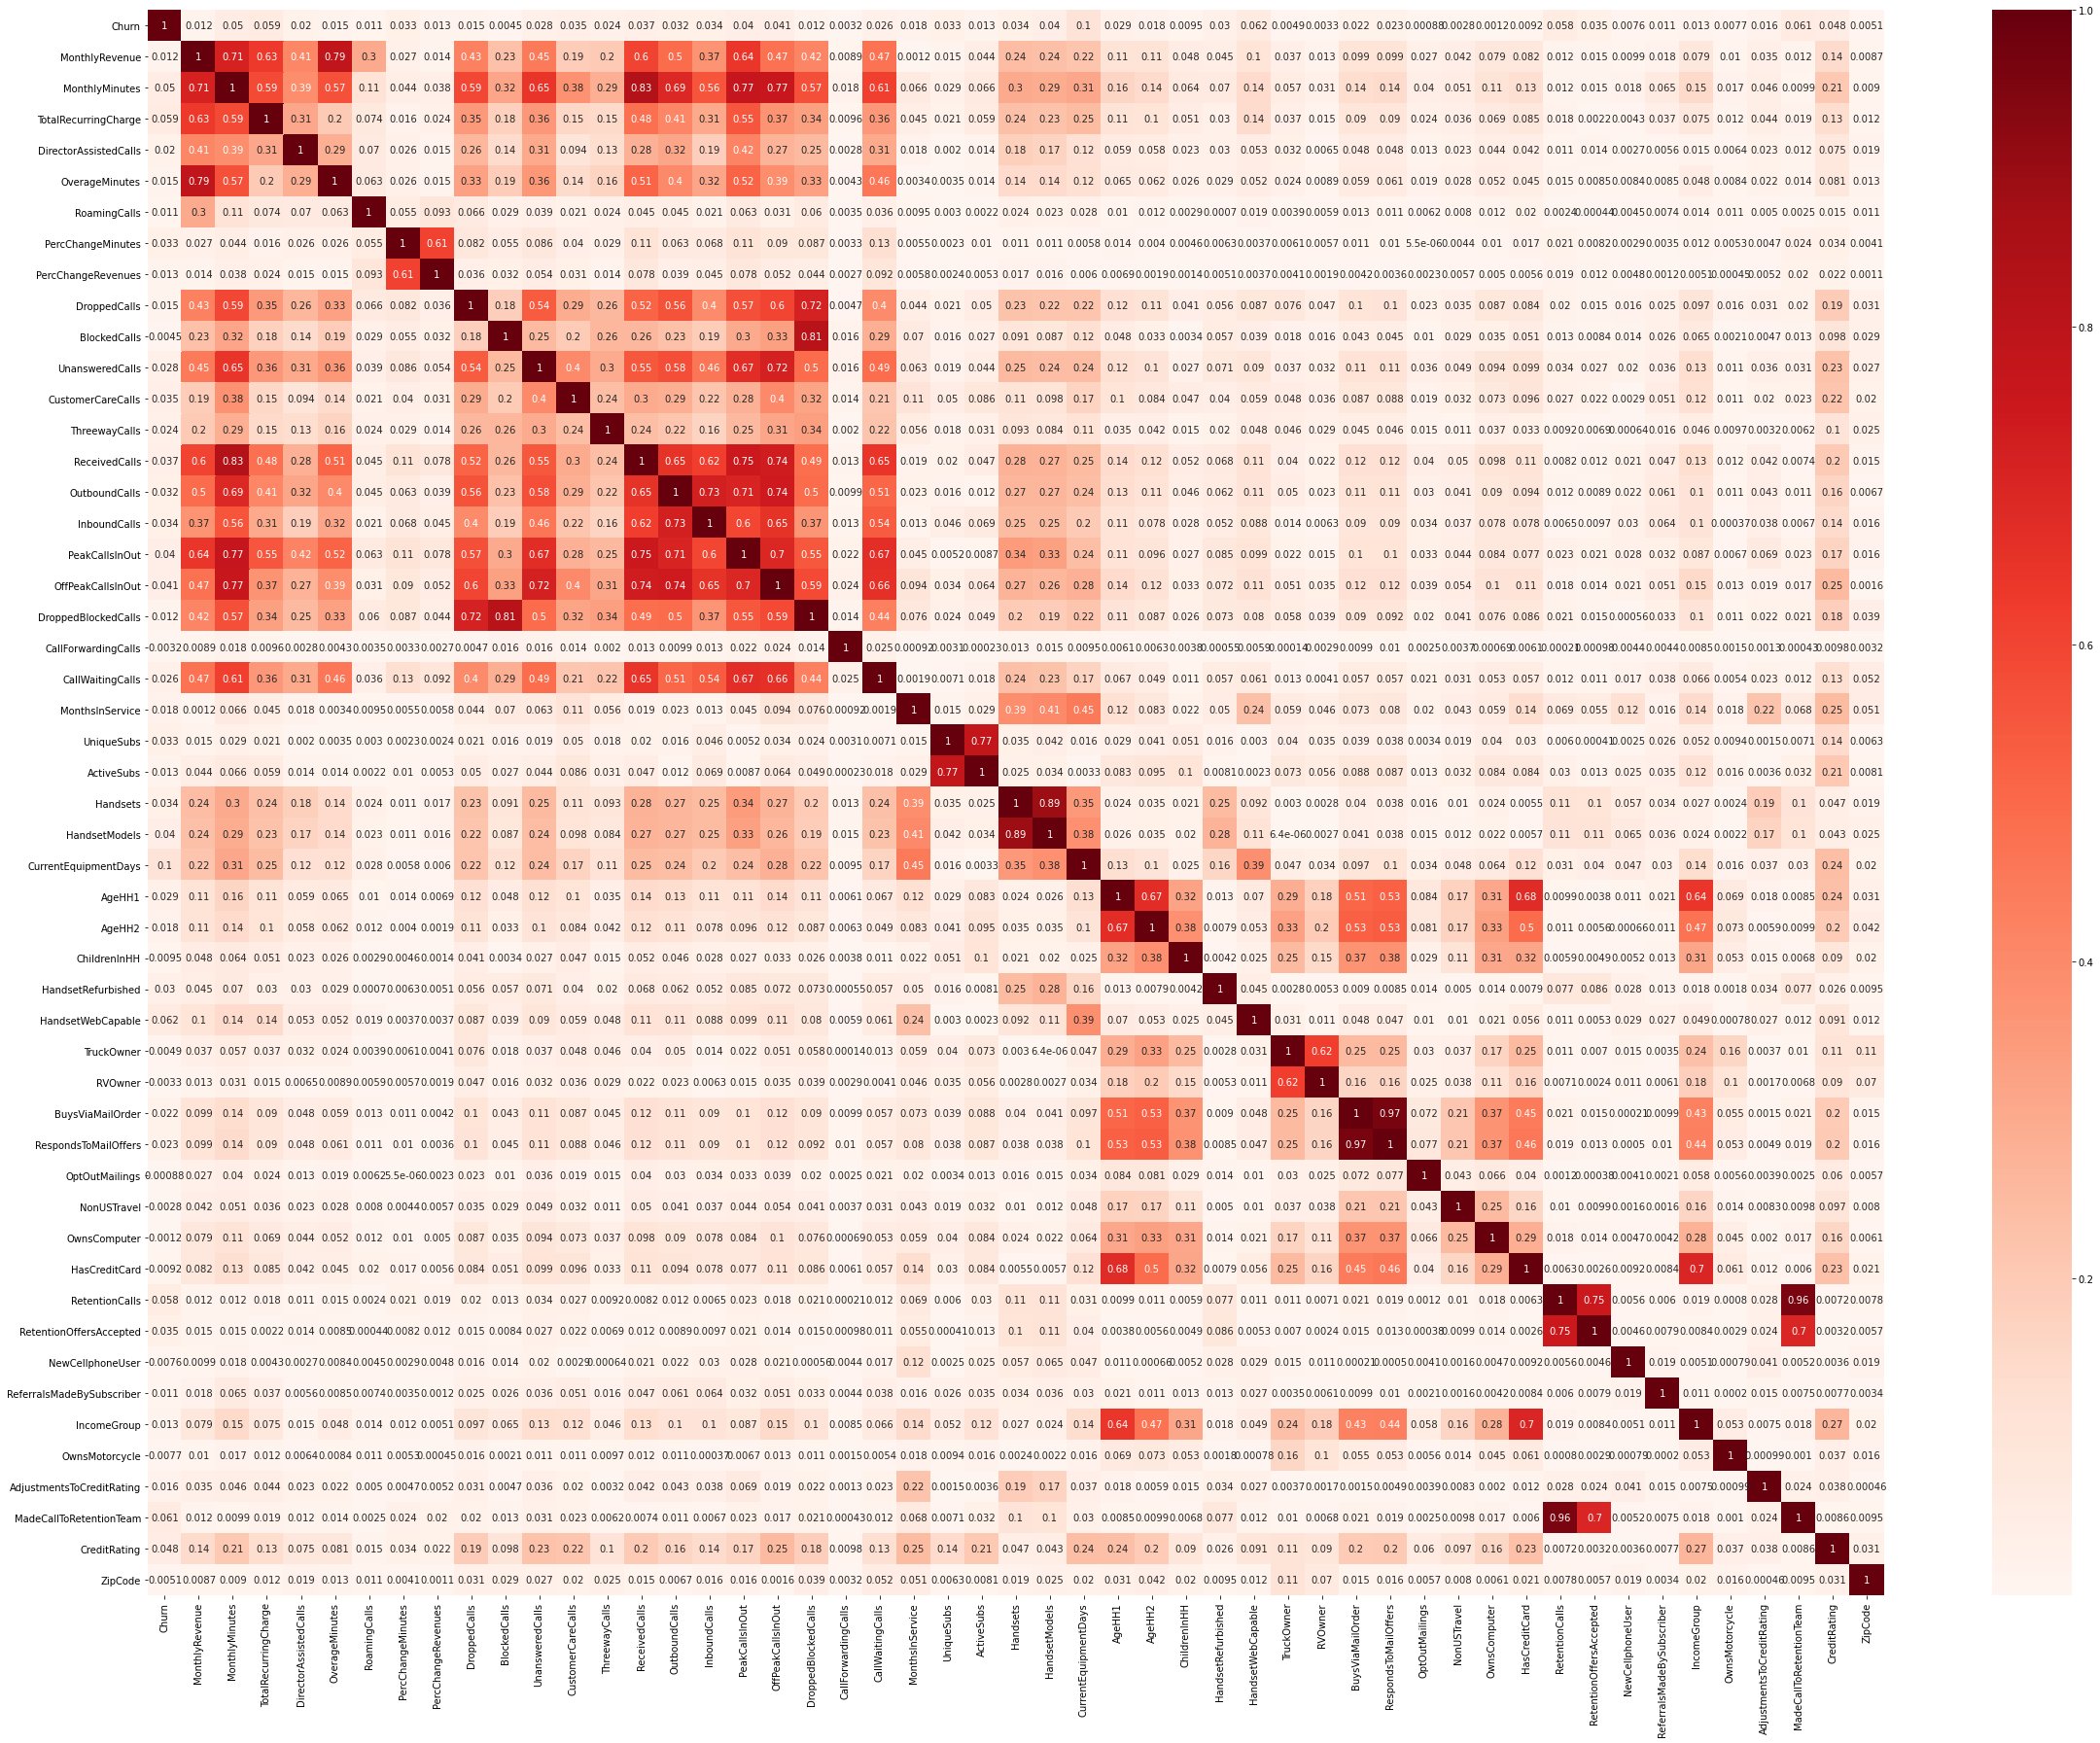

In [60]:
# Heatmap to display correlations in data
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(40,30))
sns.heatmap(corr, cmap='Reds', annot=True);

Check target variable value counts

In [61]:
df.Churn.value_counts()

0    35507
1    14245
Name: Churn, dtype: int64

Target variable is unbalanced, with Churn underrepresented compared with no Churn. This may add difficulty in performing some future analyses so will plan to resample to achieve greater target variable balance.

## Model Analysis

Assign x and y values, train_test_split, and scale + SMOTE data

In [62]:
# Assign x and y variables
x = df.drop('Churn', axis=1)
y = df.Churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15) 

# Scale data
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# SMOTE data to achieve target variable balance
sm = SMOTE(random_state=15)
x_train_scaled, y_train = sm.fit_resample(x_train_scaled, y_train)

In [63]:
# Value count confirms balanced target variable
y_train.value_counts()

1    26627
0    26627
Name: Churn, dtype: int64

### Model 0: Dummy Baseline
Used DummyClassifier to build a baseline model taking the mode to determine the outcome

Train 0.0
Test 0.0


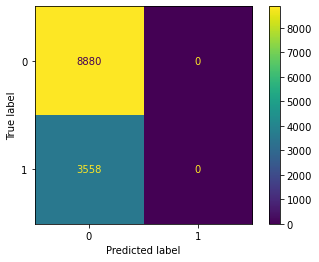

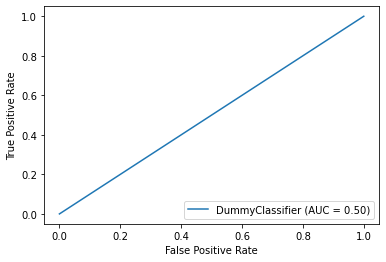

In [64]:
# Instantiated, fit, and ran dummy model
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(x_train_scaled, y_train)
y_hat_train = dummy_model.predict(x_train_scaled)
y_hat_test = dummy_model.predict(x_test_scaled)
print(f'Train {recall_score(y_train, y_hat_train)}')
print(f'Test {recall_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for dummy model
plot_confusion_matrix(dummy_model, x_test_scaled, y_test)
plot_roc_curve(dummy_model, x_test_scaled, y_test);

### Model 1: Basic Decision Tree
Used DecisionTreeClassifier to build a basic decision tree model using max_depth of 4. A decision tree was chosen to help identify features of interest to assess in future model iterations

Train 0.7462725804634394
Test 0.6630129286115796


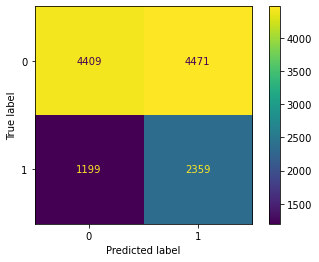

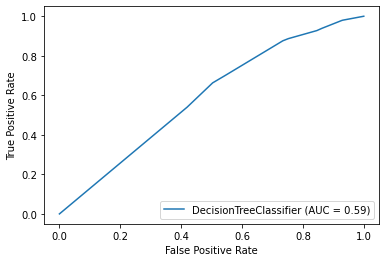

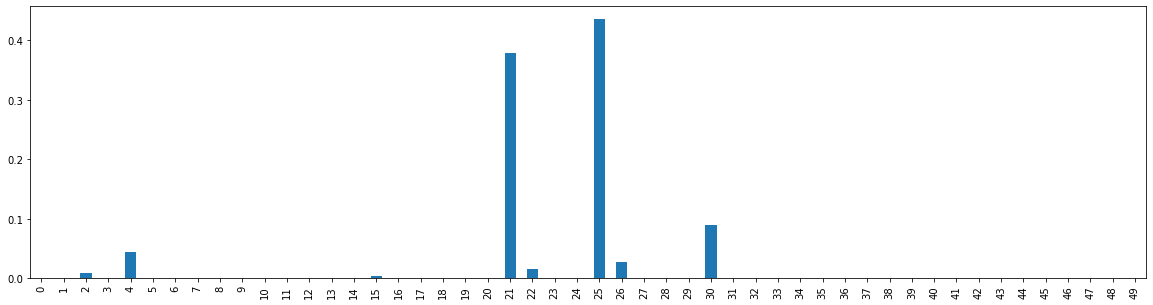

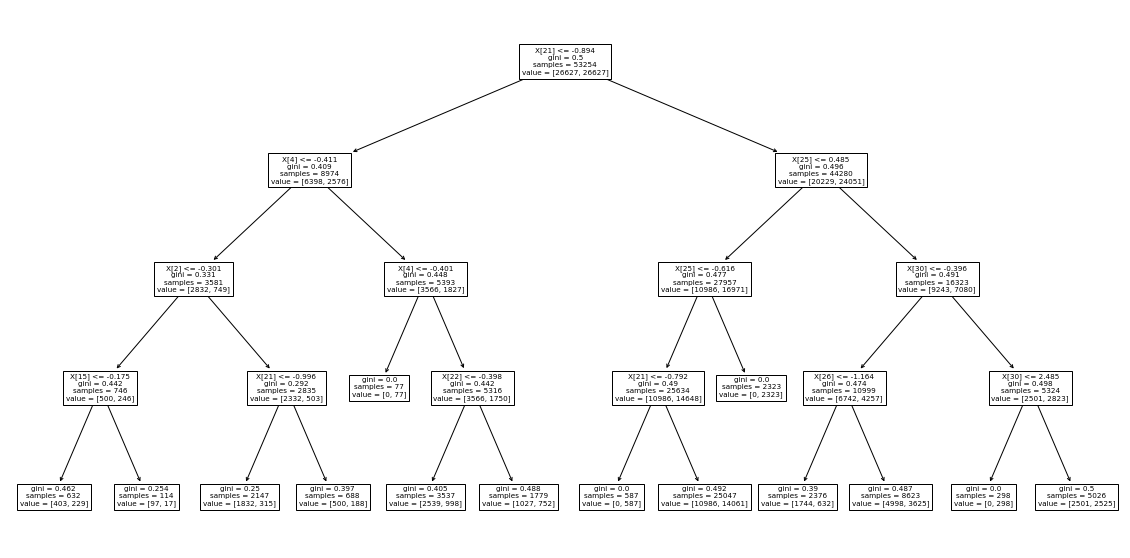

In [19]:
# Instantiated, fit, and ran basic decision tree model
clf = DecisionTreeClassifier(max_depth = 4) 
clf.fit(x_train_scaled, y_train)
y_hat_train = clf.predict(x_train_scaled)
y_hat_test = clf.predict(x_test_scaled)
print(f'Train {recall_score(y_train, y_hat_train)}')
print(f'Test {recall_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for basic decision tree model
plot_confusion_matrix(clf, x_test_scaled, y_test);
plot_roc_curve(clf, x_test_scaled, y_test);

# Plotted feature importance for basic decision tree model
ranking = clf.feature_importances_
fig, ax = plt.subplots(figsize=(20,5))
pd.Series(ranking).plot.bar(ax=ax);

# Plotted basic decision tree model
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf);

### Model 2: Basic Logistic Regression
Used LogisticRegression to build a basic logistic regression model. Logistic Regression was chosen to quantify impactful features in our analysis

Train 0.6180568595786232
Test 0.5851602023608768
[[1.057912   0.81400469 0.93682116 0.97178161 1.11297729 1.0476469
  0.85117974 1.15792444 1.03589226 1.01406496 1.0247748  0.9224431
  0.95433895 1.0487823  1.06229327 0.94283063 0.95199893 0.99437271
  1.03402211 0.99075662 1.01709406 0.78528633 1.22957611 0.87127229
  1.12507217 0.99079642 1.44880474 0.85376343 1.00015435 1.05313594
  1.08239178 0.97614427 0.98102114 0.99723721 1.13457846 0.83921716
  1.00453355 0.99080361 1.0032667  1.09431502 1.0419895  0.99548307
  0.95500024 0.97534079 0.95303181 1.03665423 0.93490707 1.0928284
  0.88371749 1.01429065]]


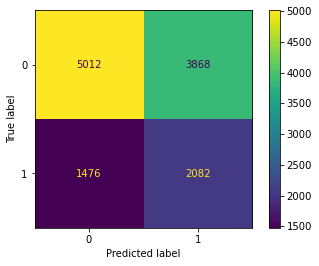

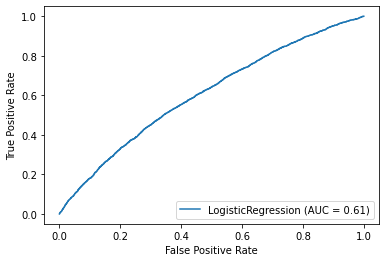

In [65]:
# Instantiated, fit, and ran basic logistic regression model
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_hat_train = lr.predict(x_train_scaled) 
y_hat_test = lr.predict(x_test_scaled) 
print(f'Train {recall_score(y_train, y_hat_train)}')
print(f'Test {recall_score(y_test, y_hat_test)}')

# Feature coefficients converted to odds ratios
print(np.exp(lr.coef_))

# Plotted confusion matrix and ROC AUC for basic logistic regression model
plot_confusion_matrix(lr, x_test_scaled, y_test)
plot_roc_curve(lr, x_test_scaled, y_test);

### Model 3: Basic KNN
Used KNeighborsClassifier to build a basic KNN model. KNN was chosen as it typically performs well on classification problems

Train 0.9330003380027792
Test 0.5188308038223721


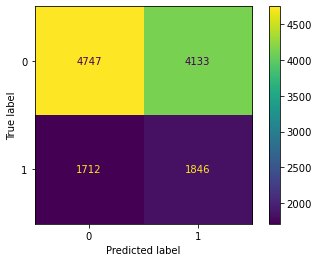

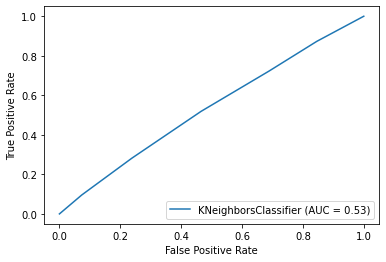

In [66]:
# Re-scaled using MinMaxScaler instead of the standard StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15) 
mscale = MinMaxScaler()
x_train_mscaled = mscale.fit_transform(x_train) 
x_test_mscaled = mscale.transform(x_test)

# Re-SMOTE to balance target variable
sm = SMOTE(random_state=15)
x_train_mscaled, y_mtrain = sm.fit_resample(x_train_mscaled, y_train)

# Instantiated, fit, and ran basic KNN model
knn = KNeighborsClassifier() 
knn.fit(x_train_mscaled, y_mtrain)
y_hat_train = knn.predict(x_train_mscaled) 
y_hat_test = knn.predict(x_test_mscaled) 
print(f'Train {recall_score(y_mtrain, y_hat_train)}')
print(f'Test {recall_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for basic KNN model
plot_confusion_matrix(knn, x_test_mscaled, y_test); 
plot_roc_curve(knn, x_test_mscaled, y_test);

Performed KNN GridSearchCV to identify parameters to optimize the KNN model

In [67]:
# Created a grid with parameters to assess
grid = {'n_neighbors': [1, 3, 5],
    'metric': ['minkowski', 'manhattan'],
    'weights': ['uniform', 'distance']}

# Instantiated, fit, and ran basic GridSearchCV for KNN
gs = GridSearchCV(estimator=knn, param_grid=grid,scoring='recall', cv=5)
gs.fit(x_train_mscaled, y_mtrain)
print(gs.best_params_)
print(gs.best_score_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.9444515645632462


### Model 4: GridSearchCV Optimized KNN
Applied parameters from the GridSearchCV to optimize the KNN model

Train 1.0
Test 0.3518830803822372


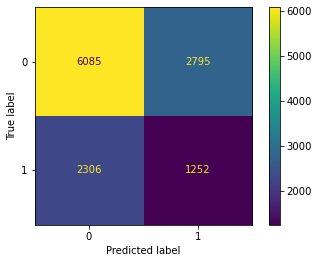

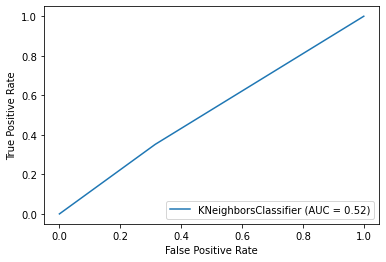

In [23]:
# Instantiated, fit, and ran optimized KNN model
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors=1, weights = 'uniform' ) 
knn.fit(x_train_mscaled, y_mtrain)
y_hat_train = knn.predict(x_train_mscaled) 
y_hat_test = knn.predict(x_test_mscaled) 
print(f'Train {recall_score(y_mtrain, y_hat_train)}')
print(f'Test {recall_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for optimized KNN model
plot_confusion_matrix(knn, x_test_mscaled, y_test) 
plot_roc_curve(knn, x_test_mscaled, y_test);

### Model 5: Decision Tree Optimized with GridSearch

In [89]:
# Creating a function that takes in the classifier as input and returns a pipeline.
def pipe_maker(classifier):
    
    pipe = imbPipeline([('scl', StandardScaler()),
                    ('clf', classifier(random_state=15))])
    return pipe

In [90]:
# Creating a function that takes in a Pipeline & Parameters then returns a gridsearch object with selected parameters.
def gridsearch_maker(pipeline, params):

    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

In [91]:
# Function that takes in a gridsearch, interates over the available hyperparameters and returns the parameters necessary
# to achieve the optimal recall score.
def best_recall(gridsearch):

    # Create best_recall object.
    best_recall = 0.0
    
    # Fit gridsearch to regularized data set.
    gridsearch.fit(x_train_scaled, y_train)
    
    # Print best parameters.
    print('Best paramaters are: %s' % gridsearch.best_params_)
    
    # Print best train Recall score.
    print('Best training recall is: %.3f' % gridsearch.best_score_)
    
    # Prediction on scaled test data.
    y_pred = gridsearch.predict(x_test_scaled)
    
    # Print test data recall with best params.
    print('Test set recall score with best parameters: %.3f ' % recall_score(y_test, y_pred))
    
    # Print confusion matrix and classification report.
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ', recall_score(y_test, y_pred))
    
    # Plot confusion matrix.
    plot_confusion_matrix(gridsearch, x_test_scaled, y_test,cmap="plasma")
    plt.show()

In [98]:
# Creating lists to be used as parameters fir the searches below
split_range = [1,5,10]
leaf_range = [1,3,5]

In [93]:
# Recreate original train test split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=15)

# Re-StandardScale
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# Re-SMOTE to balance target variable
sm = SMOTE(random_state=15)
x_train_scaled, y_train = sm.fit_resample(x_train_scaled, y_train)

Best paramaters are: {'clf__criterion': 'gini', 'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5}
Best training recall is: 0.903
Test set recall score with best parameters: 0.877 
[[2163 6717]
 [ 438 3120]]
              precision    recall  f1-score   support

           0       0.83      0.24      0.38      8880
           1       0.32      0.88      0.47      3558

    accuracy                           0.42     12438
   macro avg       0.57      0.56      0.42     12438
weighted avg       0.68      0.42      0.40     12438

Recall score:  0.8768971332209107


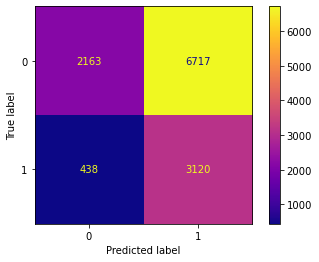

In [96]:
# Lets try DecisionTreeClassifier and see how that performs.
pipe_dt = pipe_maker(DecisionTreeClassifier)

# Creating paramaters
grid_params_dt = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': leaf_range,
                   'clf__max_depth': leaf_range,
                   'clf__min_samples_split': split_range}]

# Creating grid search object
gs_dt = gridsearch_maker(pipe_dt, grid_params_dt)

# Finding best parameters for recall score
best_recall(gs_dt)

Best paramaters are: {'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__splitter': 'random'}
Best training recall is: 0.924
Test set recall score with best parameters: 0.913 
[[1724 7156]
 [ 311 3247]]
              precision    recall  f1-score   support

           0       0.85      0.19      0.32      8880
           1       0.31      0.91      0.47      3558

    accuracy                           0.40     12438
   macro avg       0.58      0.55      0.39     12438
weighted avg       0.69      0.40      0.36     12438

Recall score:  0.9125913434513772


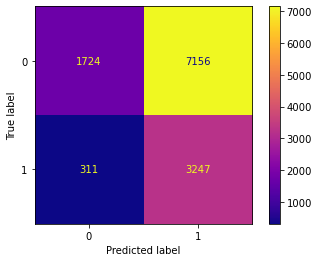

In [97]:
# Now we're on to something! Lets broaden the search to try and further optimize the model
pipe_dt = pipe_maker(DecisionTreeClassifier)

# Creating paramaters
grid_params_dt = [{
                   'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': [1,2,3,5,10],
                   'clf__max_depth': [1,2,3,5,10],
                   'clf__min_samples_split': [1,2,3,5,10],
                   'clf__class_weight': ['balanced', None],
                   'clf__splitter': ['best', 'random']
                  }]

# Creating grid search object
gs_dt = gridsearch_maker(pipe_dt, grid_params_dt)

# Finding best parameters for recall
best_recall(gs_dt)

Of the models we ran, it appears that a DecisionTreeClassifier optimized with GridSearchCV provided us with the best recall score, of .912 or 91.2%!

## Conclusions
We identified the 3 most impactful predictors of churn from our analysis:

    1. Customers are 1.45x times as likely to churn for every day that they hold the same cell phone.
    2. Customers are 1.23x times as likely to churn for every additional subscriber added onto a plan.
    3. Customers are 1.16x times as likely to churn for every 1% increase in charges.

## Recommendations
Based on our analyses we recommend our stakeholder implement 3 targeted approaches to reduce churn:

    1. Offer discounted or complimentary cell phone upgrades for loyal customers to receive the latest devices.
    2. Create a loyalty program to reward multiple subscriber customers.
    3. Control customer charges by avoiding increasing fees on customers bills.

## Next Steps
In the near Future, we want to develop a team tasked with proactively addressing churn. This team would be tasked with handling all the predictors that can be seen to contribute to churn. Furthermore, we want to feature engineer our data towards regions. This would allow us to develop localized deals based on a customer's service area. This would come down to using Zip code data as well State data.